# Used Car Price Data Analysis

In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df1 = pd.read_csv('train-data.csv')
df2 = pd.read_csv('test-data.csv')

In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1234 non-null   int64  
 1   Name               1234 non-null   object 
 2   Location           1234 non-null   object 
 3   Year               1234 non-null   int64  
 4   Kilometers_Driven  1234 non-null   int64  
 5   Fuel_Type          1234 non-null   object 
 6   Transmission       1234 non-null   object 
 7   Owner_Type         1234 non-null   object 
 8   Mileage            1234 non-null   object 
 9   Engine             1224 non-null   object 
 10  Power              1224 non-null   object 
 11  Seats              1223 non-null   float64
 12  New_Price          182 non-null    object 
dtypes: float64(1), int64(3), object(9)
memory usage: 125.5+ KB


In [5]:
df1.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [8]:
df1 = df1.iloc[:,1:]
df1.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [9]:
df1.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [10]:
df1.shape

(6019, 12)

In [11]:
df1['Kilometers_Driven'].value_counts()

60000    82
45000    70
65000    68
50000    61
70000    60
         ..
50446     1
54540     1
70920     1
75014     1
83969     1
Name: Kilometers_Driven, Length: 3093, dtype: int64

In [13]:
print(df1['Location'].unique())
print(df1['Fuel_Type'].unique())
print(df1['Transmission'].unique())
print(df1['Owner_Type'].unique())

['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']
['CNG' 'Diesel' 'Petrol' 'LPG' 'Electric']
['Manual' 'Automatic']
['First' 'Second' 'Fourth & Above' 'Third']


In [17]:
df1.isnull().sum()

Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [19]:
print("Shape of train data Before dropping any Row: ",df1.shape)
df1 = df1[df1['Mileage'].notna()]
print("Shape of train data After dropping Rows with NULL values in Mileage: ",df1.shape)
df1 = df1[df1['Engine'].notna()]
print("Shape of train data After dropping Rows with NULL values in Engine : ",df1.shape)
df1 = df1[df1['Power'].notna()]
print("Shape of train data After dropping Rows with NULL values in Power  : ",df1.shape)
df1 = df1[df1['Seats'].notna()]
print("Shape of train data After dropping Rows with NULL values in Seats  : ",df1.shape)

Shape of train data Before dropping any Row:  (6019, 12)
Shape of train data After dropping Rows with NULL values in Mileage:  (6017, 12)
Shape of train data After dropping Rows with NULL values in Engine :  (5981, 12)
Shape of train data After dropping Rows with NULL values in Power  :  (5981, 12)
Shape of train data After dropping Rows with NULL values in Seats  :  (5975, 12)


In [20]:
df1 = df1.reset_index(drop=True)

## Data Visualization

/Users/shivambhosale/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 160.0)

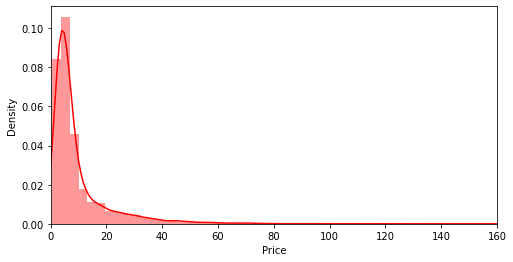

In [30]:
f, ax = plt.subplots(figsize=(8,4))
sns.distplot(df1['Price'],color='red')
plt.xlim([0,160])

In [31]:
df1['Fuel_Type'].describe()

count       5975
unique         4
top       Diesel
freq        3195
Name: Fuel_Type, dtype: object

(-0.5, 3.5, 0.0, 165.0)

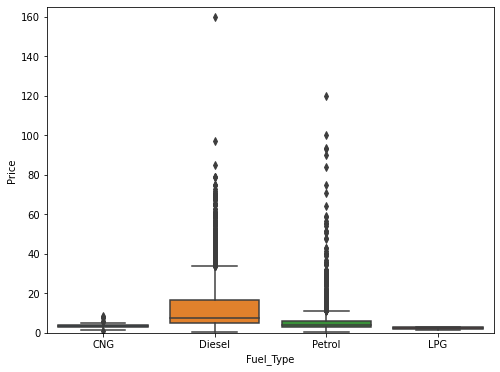

In [33]:
var = 'Fuel_Type'
data = pd.concat([df1['Price'],df1[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="Price", data=data)
fig.axis(ymin=0, ymax=165)

/Users/shivambhosale/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 21.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/shivambhosale/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 78.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/shivambhosale/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 88.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Fuel_Type', ylabel='Price'>

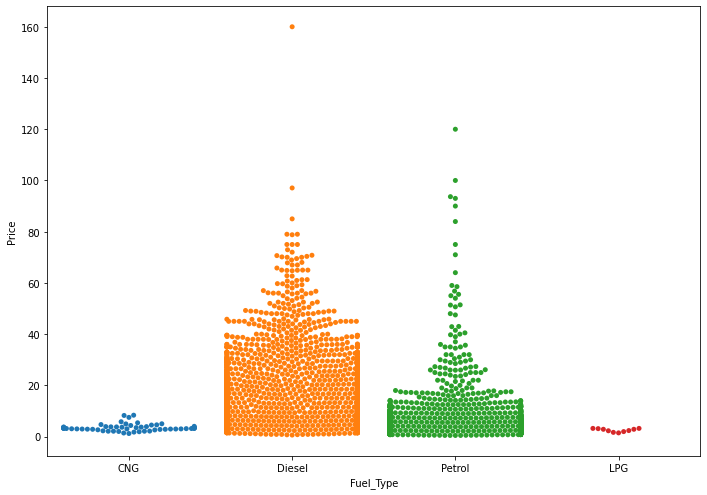

In [35]:
var = 'Fuel_Type'
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.swarmplot(x = var, y ='Price', data = df1)

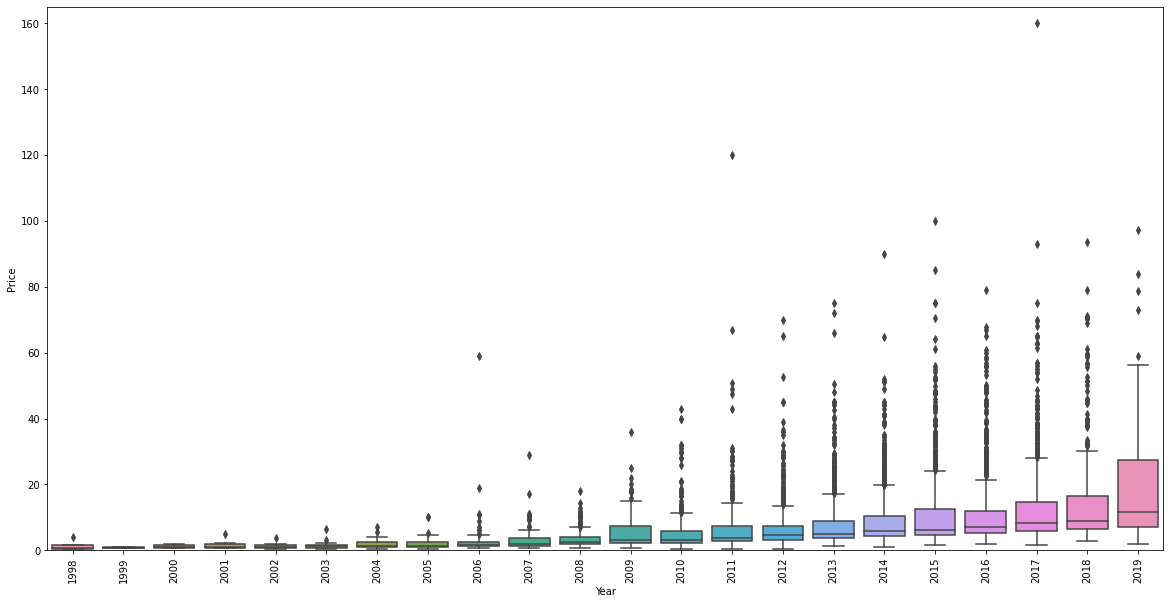

In [36]:
var = 'Year'
data = pd.concat([df1['Price'], df1[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 10))
fig = sns.boxplot(x=var, y="Price", data=data)
fig.axis(ymin=0, ymax=165);
plt.xticks(rotation=90);

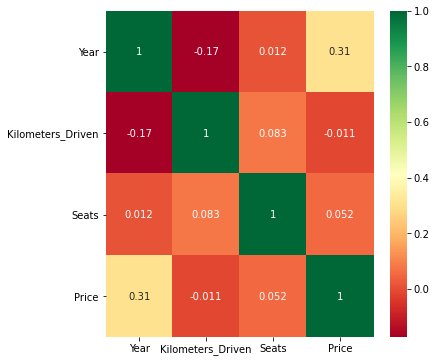

In [66]:
plt.figure(figsize=(6,6))
sns.heatmap(df1.corr(),annot=True,cmap='RdYlGn')
plt.show()